# Chapter.3 Single-variate Linear Regression without Bias Term

## Programming Assignment.3-08 SVLR without BIas Term for Several Samples

PA 3-08에서는 여러개의 data sample을 이용하여 $\theta$를 학습시키는 방법을 구현합니다.  
이때 PA 3-08에선 dataset에 포함된 모든 data sample들을 이용하는 방법인 Batch Gradient Descent Method를 다룹니다.

이 과정을 학습하기 위해 PA 3-08은 다음의 단계로 이루어집니다.

<ul>
    <li> Step.1 Dataset Preparation </li>
    <li> Step.2 Model/Cost Implementation </li>
    <li> Step.3 Vector Size Test </li>
    <li> Step.4 Learning </li>
</ul>


여러개의 data sample을 이용하여 $\theta$를 학습시킬 때 loss가 아닌 cost를 이용합니다.  
그리고 이 cost에 대한 $\theta$의 partial derivative를 구하고,  
이 partial derivative를 이용하여 gradient descent method를 통해 $\theta$를 학습시킵니다.

이 과정을 수식으로 표현하면 다음과 같습니다.  
$$\mathcal{L}^{(i)} = (y^{(i)} - \hat{y}^{(i)})^{2}$$
$$J = \frac{1}{n}\sum_{i=1}^{n} \mathcal{L}^{(i)}$$
$$\frac{\partial J}{\partial \theta} = \frac{1}{n}\sum_{i=1}^{n} \frac{\partial \mathcal{L}^{(i)}}{\theta}$$

위의 과정을 진행하기 위해 먼저 다음 셀을 실행시켜 필요한 library와 module들을 import 해줍니다.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import os
import sys
utils_path = '/Users/sanghyuk/Documents/deep_learning_math/utils'
if utils_path not in sys.path:    
    sys.path.append(utils_path)
print(os.sys.path[-1], '\n')

import basic_nodes as nodes
from LR_dataset_generator import LR_dataset_generator
    
plt.style.use('seaborn')
np.random.seed(0)

/Users/sanghyuk/Documents/deep_learning_math/utils 



***
## Step.1 Dataset Preparation

여러개의 data sample을 이용하여 학습을 진행할 때 dataset에는 변화가 없습니다.  
따라서 PA 3-06에서 사용한 dataset preparation 코드를 그대로 사용합니다.

***
**Programming**  
SVLR without bias term model을 위한 dafault dataset을 만드세요.

In [3]:
##### Start Your Code(Dataset Preparation) #####
data_gen = LR_dataset_generator(1)
dataset = data_gen.make_dataset()
##### Start Your Code(Dataset Preparation) #####
dataset.shape

(100, 3)

***
## Step.2 Model/Cost Implementation

Intro에서 설명한 연산을 basic building node들을 이용하여 표현하면 다음과 같습니다.

<img src='./imgs/3_08_01.png' width = 600>
따라서 위의 연산을 하기 위해선 model에는 변화가 없고 PA 3-06의 implementation부분에서 mean_node()가 추가됩니다.  

***
**Programming**  
model과 cost를 연산하는 과정을 위한 node들을 instantiation하세요.

In [6]:
##### Start Your Code(Model Implementation) #####
node1 = nodes.mul_node()
##### End Your Code(Model Implementation) #####


##### Start Your Code(Cost Implementation) #####
node2 = nodes.minus_node()
node3 = nodes.square_node()
node4 = nodes.mean_node()
##### End Your Code(Cost Implementation) #####

***
## Step.3 Vector Size Test

Step.3에서는 Step.2에서 instantiation된 node들을 이용하여 forward/backward propagation이 될 때  
node들의 input/output vector들의 dimension을 확인해봅니다.

그리고 각 과정에서 강의에서 설명한 다음의 내용과 일치하는지 확인해보세요.  
이때 NumPy의 특성을 이용하여 Jacobian matrix들은 vector form으로 바뀌어 연산됩니다.
<img src='./imgs/3_08_02.png'>

먼저 test_x, test_y들을 다음과 같이 100-dimensional vector로 만들고 th는 1로 설정해줍니다.

In [7]:
test_x = np.random.randn(100)
test_y = np.random.randn(100)
th = 1

print("Shape of test_x : ", test_x.shape)
print("Shape of test_y : ", test_y.shape)

Shape of test_x :  (100,)
Shape of test_y :  (100,)


**Expected Output**  
Shape of test_x :  (100,)  
Shape of test_y :  (100,)

***
**Programming**  
위의 test_x, test_y를 이용하여 forward propagation을 구현하고  
Z1, Z2, Z3, J의 shape을 확인합니다.  
(Hint.1) shape이 ()이면 scalar를 의미합니다.

In [12]:
theta = 1
##### Start Your Code(Forward Propagation) #####
Z1 = node1.forward(theta, test_x)
Z2 = node2.forward(test_y, Z1)
Z3 = node3.forward(Z2)
J = node4.forward(Z3)
##### End Your Code(Forward Propagation) #####

print("Shape of Z1 : ", Z1.shape)
print("Shape of Z2 : ", Z2.shape)
print("Shape of Z3 : ", Z3.shape)
print("Shape of J : ", J.shape)

Shape of Z1 :  (100,)
Shape of Z2 :  (100,)
Shape of Z3 :  (100,)
Shape of J :  ()


**Expected Output**  
Shape of Z1 :  (100,)  
Shape of Z2 :  (100,)  
Shape of Z3 :  (100,)  
Shape of J :  ()

***
**Programming**  
다음으로 backpropagation을 구현하고  
dZ3, dZ2, dZ1, dTh의 shape을 확인합니다.

In [13]:
##### Start Your Code(Backpropagation) #####
dZ3 = node4.backward(1)
dZ2 = node3.backward(dZ3)
dY, dZ1 = node2.backward(dZ2)
dTh, dX = node1.backward(dZ1)
##### End Your Code(Backpropagation) #####

print("Shape of dZ3 : ", dZ3.shape)
print("Shape of dZ2 : ", dZ2.shape)
print("Shape of dZ1 : ", dZ1.shape)
print("Shape of dTh : ", dTh.shape)

Shape of dZ3 :  (100,)
Shape of dZ2 :  (100,)
Shape of dZ1 :  (100,)
Shape of dTh :  (100,)


**Expected Output**  
Shape of dZ3 :  (100,)  
Shape of dZ2 :  (100,)  
Shape of dZ1 :  (100,)  
Shape of dTh :  (100,)

dTh는 아직 vector이기 때문에 이들을 모두 합하여 실제 $\theta$를 학습시키기 위한 dth를 구해야 합니다.

***
**Programming**  
dTh의 원소들을 모두 합하여 dth를 구하세요.  
(Hint.1) np.sum()

In [16]:
##### Start Your Code(dth) #####
dth = np.sum(dTh)
##### End Your Code(dth) #####

print("Shape of dth : ", dth.shape)
print(dth)

Shape of dth :  ()
1.7959697258598397


**Expected Output**  
Shape of dth :  ()

***
## Step.4 Learning

Step.3까지의 내용을 바탕으로 batch gradient descent method를 구현합니다.  
이때 batch gradient descent method는 dataset을 모두 이용하기 때문에 epoch보단 iteration이라는 이름으로 학습조건을 설정해줍니다.

PA 3-06에서부터 달라지는 점은 다음과 같습니다.
- data sample을 뽑는 과정이 없어집니다.
- dTh를 np.sum()을 이용하여 dth로 만들어준 뒤, gradient descent method를 적용합니다.

***
**Programming**  
다음의 조건에서 model을 학습시키는 과정을 구현하세요.
- initial theta = 0.1
- learning rate = 0.01
- total iteration = 300


Text(0.5, 1.0, '$\\mathcal{L}$')

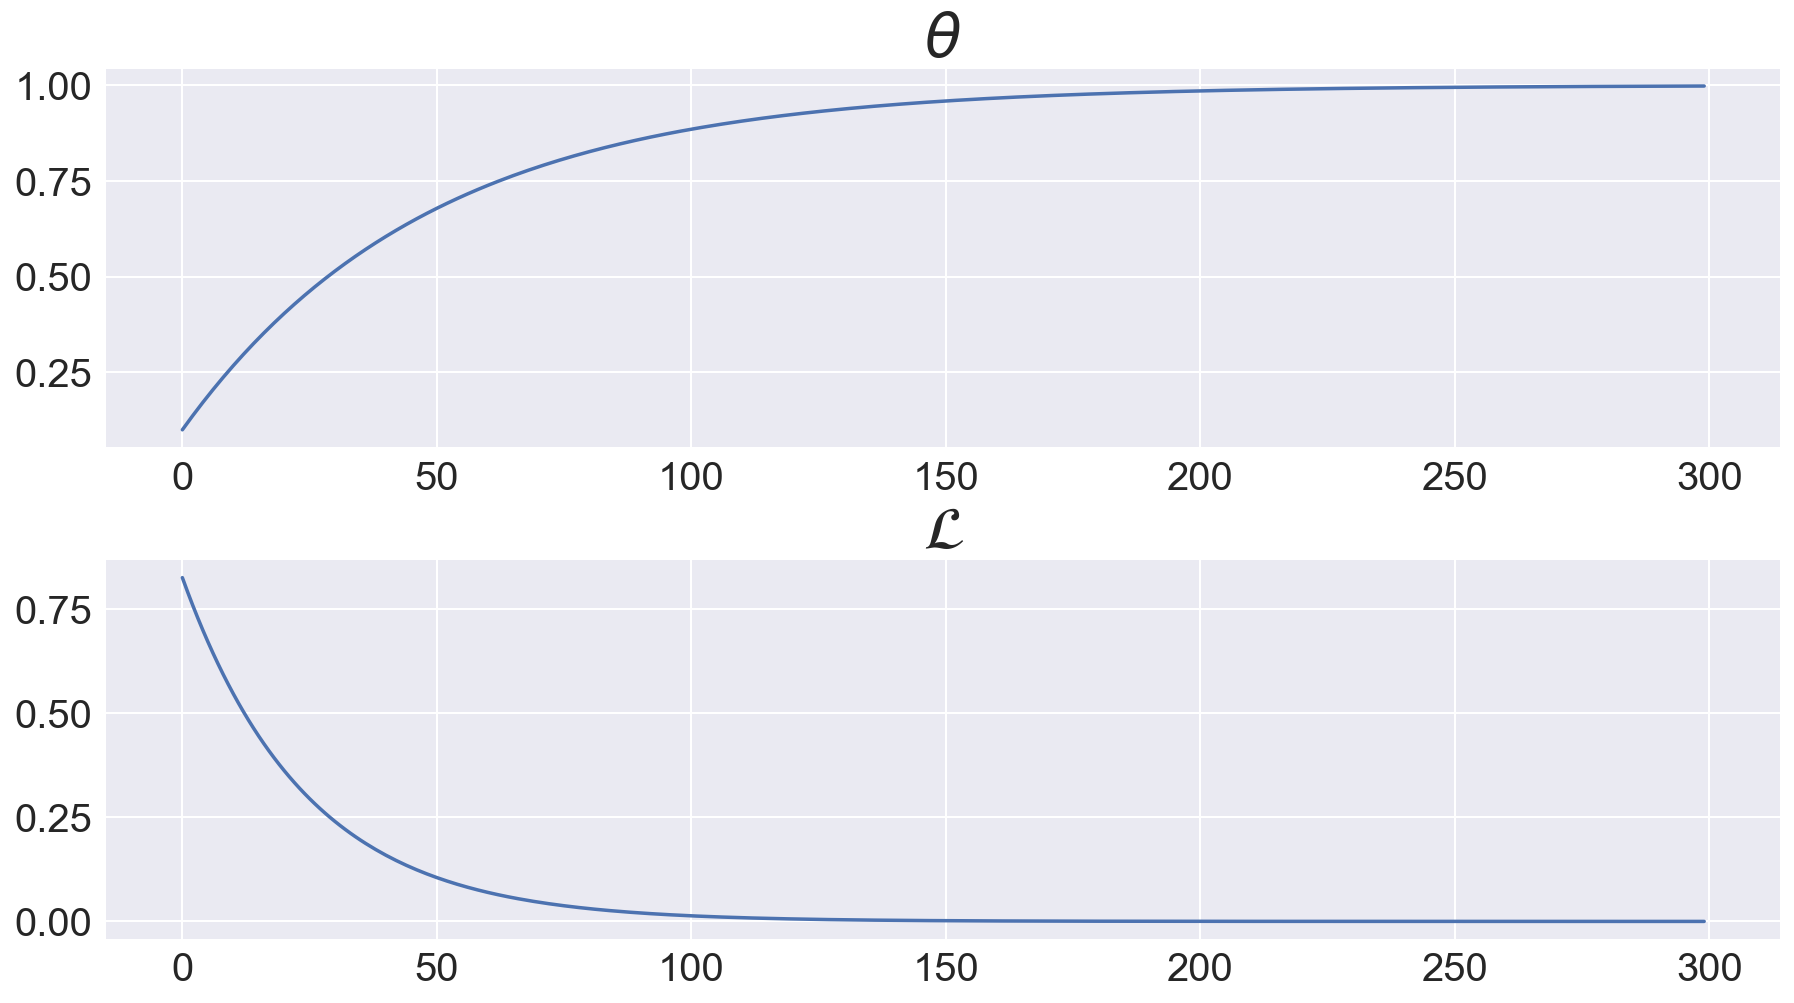

In [20]:
##### Start Your Code(Learning Preparation) #####
th = 0.1
lr = 0.01
iterations = 300 
##### End Your Code(Learning Preparation) #####

th_list = []
loss_list = []
    
for iteration in range(iterations):
    ##### Start Your Code(Forward Propagation) #####
    X, Y = dataset[:, 1], dataset[:,2]
    Z1 = node1.forward(th, X)
    Z2 = node2.forward(Y, Z1)
    Z3 = node3.forward(Z2)
    J = node4.forward(Z3)
    ##### End Your Code(Forward Propagation) #####
    
    
    ##### Start Your Code(Backpropagation) #####
    dZ3 = node4.backward(1)
    dZ2 = node3.backward(dZ3)
    dY, dZ1 = node2.backward(dZ2)
    dTh, dX = node1.backward(dZ1)
    ##### End Your Code(Backpropagation) #####
    
    th_list.append(th)
    loss_list.append(J)
    
    ##### Start Your Code(Gradient Descent Method) #####
    th = th - lr*np.sum(dTh)
    ##### End Your Code(Gradient Descent Method) #####
      
fig, ax = plt.subplots(2, 1, figsize = (15,8))
fig.subplots_adjust(hspace = 0.3)
ax[0].plot(th_list)
ax[1].plot(loss_list)
ax[0].tick_params(axis = 'both', labelsize = 20)
ax[1].tick_params(axis = 'both', labelsize = 20)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)

**Expected Output**  
<img src='./imgs/3_08_03.png'>